## Demo Week 4: Lecture 2

In this demonstration we want to understand components of the `pandas` package. We will look at useful tools for

- Inpecting a Table 
- Sorting the Numbers in a Table 
- Summarizing through Statistics like Average and Standard Deviation

We will focus on two operations: grouping and pivoting

- groupby function for pulling together rows according to some pattern
- operation 
 * agg
 * size 
 * filter
- pivot tables for grouping with two patterns

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from IPython.display import Image

#### Useful Tools

In [212]:
elections = pd.read_csv(os.environ["HOME"] + "/shared/election_data.csv")

##### Look at the data

In [9]:
elections.head(3)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927


In [10]:
elections.tail(5)

,Year,Candidate,Party,Popular vote,Result,%
173,2016,Donald Trump,Republican,62984828,win,46.407862
174,2016,Evan McMullin,Independent,732273,loss,0.539546
175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539
177,2016,Jill Stein,Green,1457226,loss,1.073699


In [38]:
elections.sample(10)

,Year,Candidate,Party,Popular vote,Result,%
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
25,1860,John C. Breckinridge,Southern Democratic,848019,loss,18.138998
16,1848,Zachary Taylor,Whig,1360235,win,47.309296
55,1900,William Jennings Bryan,Democratic,6370932,loss,46.130540
149,1996,Ralph Nader,Green,685297,loss,0.712721
65,1908,William Taft,Republican,7678335,win,52.013300
19,1852,Winfield Scott,Whig,1386942,loss,44.056548
97,1944,Franklin Roosevelt,Democratic,25612916,win,53.773801
33,1876,Rutherford Hayes,Republican,4034142,win,48.471624
24,1860,John Bell,Constitutional Union,590901,loss,12.639283


In [17]:
elections.shape

(178, 6)

In [19]:
elections.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177], dtype=int64

In [20]:
elections.columns

Index(['Year', 'Candidate', 'Party', 'Popular vote', 'Result', '%'], dtype='object')

In [16]:
elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
Year            178 non-null int64
Candidate       178 non-null object
Party           178 non-null object
Popular vote    178 non-null int64
Result          178 non-null object
%               178 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.4+ KB


You should only read a file from storage with a least twice the available memory. 

##### Sort

In [45]:
elections["Year"].unique()

array([1824, 1828, 1832, 1836, 1840, 1844, 1848, 1852, 1856, 1860, 1864,
       1868, 1872, 1876, 1880, 1884, 1888, 1892, 1896, 1900, 1904, 1908,
       1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952,
       1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,
       2000, 2004, 2008, 2012, 2016], dtype=int64)

In [ ]:
elections["Party"].isin(["Democratic", "Republican"])

In [ ]:
elections[elections["Party"].isin(["Democratic", "Republican"])]

In [ ]:
elections.sort_values("%")

In [ ]:
elections.sort_values("%", ascending=False)

Note that tools like `sort_values` do not change the table. We can check that `elections` has not been sorted by the percent vote.

In [ ]:
elections

##### Summarize 

In [67]:
average = sum(elections["%"]) / len(elections["%"])
average

27.528089887651696

In [68]:
elections["%"].mean()

27.528089887651696

In [69]:
variance = sum((elections["%"] - avg)**2) / len(elections["%"]) 
variance**(1/2)

22.870693567941952

In [70]:
elections["%"].std()

22.935209051726073

In [50]:
dem_rep = elections[elections["Party"].isin(["Democratic", "Republican"])][["Party","%"]]

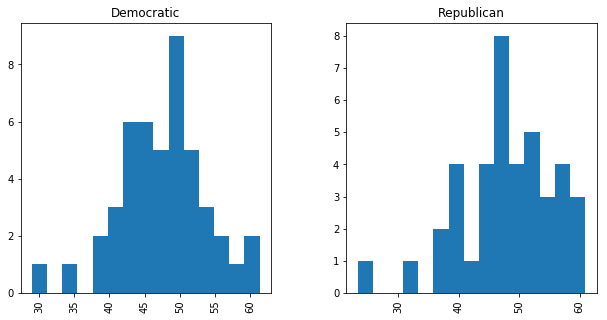

In [62]:
dem_rep.hist(bins=15, by="Party", figsize = (10,5));

#### Apply

Let's start by loading the New York baby names.

In [107]:
babynames = pd.read_csv(os.environ["HOME"] + "/shared/NY_babynames.csv")

In [72]:
babynames.head(3)

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990


We want to answer several questions about the dataset. 

**Question** what was the most popular name last year? 

In [74]:
babynames[babynames["Year"] == 2018].sort_values(by = "Count", ascending = False).head(5)

,State,Sex,Year,Name,Count
294173,NY,M,2018,Liam,1509
294174,NY,M,2018,Noah,1268
166664,NY,F,2018,Emma,1095
166665,NY,F,2018,Olivia,1083
294175,NY,M,2018,Jacob,1010


**Question** Which names start with the letter e? 

In [3]:
babynames["Name"].head(10)

0         Mary
1        Helen
2      Dorothy
3     Margaret
4      Frances
5         Ruth
6       Evelyn
7        Alice
8     Virginia
9    Elizabeth
Name: Name, dtype: object

In [77]:
# loop 

start_with_e = []

for name in babynames["Name"]:
    if name[0] == "E":
        start_with_e.append(name)

start_with_e[:5]

['Elizabeth', 'Evelyn', 'Ethel', 'Edna', 'Eleanor']

In [80]:
# list comprehension 

start_with_e = [name for name in babynames["Name"] if name[0] == 'E']

start_with_e[:5]

['Elizabeth', 'Evelyn', 'Ethel', 'Edna', 'Eleanor']

In [81]:
# apply 

def get_first_letter(some_string):
    return some_string[0]

new_column_letter = babynames["Name"].apply(get_first_letter)

In [84]:
babynames["Letter"] = new_column_letter
babynames.head(3)

,State,Sex,Year,Name,Count,Letter
0,NY,F,1910,Mary,1923,M
1,NY,F,1910,Helen,1290,H
2,NY,F,1910,Rose,990,R


In [ ]:
babynames[babynames["Letter"].isin(["E"])]["Name"]

In [ ]:
babynames.drop(columns=["Letter"])

In [87]:
babynames.drop(columns=["Letter"], inplace = True)

**Exercise** Return all names ending with y

**Question** Sort the data by the number of occurrences of "dr" plus the number of occurences of "ea" in the name. 

In [92]:
def dr_ea_count(some_string):
    return some_string.count('dr') + some_string.count('ea')

In [93]:
babynames["dr_ea_count"] = babynames["Name"].apply(dr_ea_count)

In [94]:
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)

In [95]:
babynames = babynames.drop("dr_ea_count", 1)
babynames.head(5)

,State,Sex,Year,Name,Count
76141,NY,F,1978,Deandrea,5
120958,NY,F,1999,Deandrea,5
95292,NY,F,1988,Deandrea,6
149033,NY,F,2011,Andrea,137
235701,NY,M,1986,Leandro,5


In [118]:
babynames = pd.read_csv(os.environ["HOME"] + "/shared/NY_babynames.csv")

In [119]:
babynames.head(3)

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990


Another approach is to take advantage of the fact that .loc can accept an index. That is:
 + df.loc[idx] returns df with its rows in the same order as the given index.
 + Only works if the index exactly matches the DataFrame.

The first step was to create a sequence of the lengths of the names.

In [120]:
dr_ea_counts_series = babynames["Name"].apply(dr_ea_count)
dr_ea_counts_series.head(3)

0    0
1    0
2    0
Name: Name, dtype: int64

The next step is to sort the new series we just created.

In [121]:
dr_ea_counts_series_sorted = dr_ea_counts_series.sort_values(ascending = False)
dr_ea_counts_series_sorted.head(5)

120958    3
95292     3
76141     3
155515    2
85330     2
Name: Name, dtype: int64

Next, we pass the index of the sorted series to the loc method of the original dataframe.

In [122]:
dr_ea_counts_series_sorted_index = dr_ea_counts_series_sorted.index
dr_ea_counts_series_sorted_index

Int64Index([120958,  95292,  76141, 155515,  85330, 105708,  28063, 224812,
            124584, 193786,
            ...
            196232, 196231, 196230, 196229, 196228, 196227, 196226, 196225,
            196223,      0],
           dtype='int64', length=296199)

In [123]:
babynames.loc[dr_ea_counts_series_sorted_index].head(5)

,State,Sex,Year,Name,Count
120958,NY,F,1999,Deandrea,5
95292,NY,F,1988,Deandrea,6
76141,NY,F,1978,Deandrea,5
155515,NY,F,2013,Alexandrea,9
85330,NY,F,1983,Leandra,6


Note we can also do this all in one line:

In [124]:
babynames.loc[babynames["Name"].apply(dr_ea_count).sort_values(ascending=False).index].head(5)

,State,Sex,Year,Name,Count
120958,NY,F,1999,Deandrea,5
95292,NY,F,1988,Deandrea,6
76141,NY,F,1978,Deandrea,5
155515,NY,F,2013,Alexandrea,9
85330,NY,F,1983,Leandra,6


#### Grouping

Suppose we want to understand trends in names. 

**Question** What name has changed most in popularity? Here we can measure the change as the difference between maximum count and minimum count

In [125]:
jennifer_counts = babynames[babynames["Name"] == "Jennifer"]["Count"]
jennifer_counts.head(5)

16256    6
17091    5
17813    5
19291    5
19873    9
Name: Count, dtype: int64

In [126]:
def max_minus_min(series):
    return max(series) - min(series)

In [127]:
max_minus_min(jennifer_counts)

5519

As a first approach, we can try to use a for loop.

In [129]:
#build dictionary where entry i is the max_minus_min for the given name
#e.g. max_minus_min["jennifer"] should be 5519

max_minus_min_of_babyname_counts = {}

for name in babynames["Name"].unique()[0:10]:
    counts_of_current_name = babynames[babynames["Name"] == name]["Count"]
    max_minus_min_of_babyname_counts[name] = max_minus_min(counts_of_current_name)
    

In [130]:
#convert to series
max_minus_min_of_babyname_counts = pd.Series(max_minus_min_of_babyname_counts) 
max_minus_min_of_babyname_counts

Mary        5518
Helen       4086
Rose        2350
Anna        2315
Margaret    2759
Dorothy     3417
Ruth        2715
Lillian     1541
Florence    1888
Frances     1889
dtype: int64

Answer below. Note that we only used the first 10 names because otherwise the code takes ages to complete running.

As a second approach, we could instead use groupby.agg operation. The groupby.agg operation is both simple and efficien -- in particular we can use it on the dataset without a long wait. 

In [136]:
babynames.groupby("Name").agg({"Count":max}).head(5)

,Count
Name,
Aaban,6
Aaden,63
Aadhya,8
Aadi,7
Aadil,5


In [137]:
babynames.groupby("Name").agg({"Count":min}).tail(5)

,Count
Name,
Zyire,5
Zyla,6
Zylah,6
Zymir,5
Zyon,5


In [ ]:
babynames.groupby("Name").agg({"Count":max_minus_min}).sort_values(by = "Count", ascending = False)

**Exercise** How can we understand the following code? Did Woodrow Wilson campaign in 2016?

In [141]:
elections = pd.read_csv(os.environ["HOME"] + "/shared/election_data.csv")
elections.sample(5)

,Year,Candidate,Party,Popular vote,Result,%
26,1860,Stephen A. Douglas,Northern Democratic,1380202,loss,29.522311
110,1956,T. Coleman Andrews,States' Rights,107929,loss,0.174883
154,2000,Pat Buchanan,Reform,448895,loss,0.426819
109,1956,Dwight Eisenhower,Republican,35579180,win,57.650654
10,1840,Martin Van Buren,Democratic,1128854,loss,46.948787


In [142]:
elections.groupby("Party").agg(max).head(10)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1976,Thomas J. Anderson,873053,loss,21.554001
American Independent,1976,Lester Maddox,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2016,Michael Peroutka,203091,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,2016,Woodrow Wilson,69498516,win,61.344703


We can correct the problem. Each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its highest percentage.

In [56]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.head(5)

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326


In [145]:
def select_first(some_series):
    return some_series.values[0]

elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.groupby("Party").agg(select_first)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2008,Chuck Baldwin,199750,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,1964,Lyndon Johnson,43127041,win,61.344703


#### Groups

Applying a groupby operation to a Data Frame produces
a DataFrameGroupBy object. 

In [57]:
elections.groupby("Party")

In [ ]:
for n, g in elections.groupby("Party"):
    print(n)
    display(g)

In [ ]:
elections.groupby("Party").get_group("Democratic")

Functions can then be applied to DataFrameGroupBy objects to create new Data Frames and Series. We should study a couple of these functions (sometimes called methods).

**groupby.size()**

In [153]:
#size returns a Series giving the size of each group

elections.groupby("Party").size().head(3)

Party
American                2
American Independent    3
Anti-Masonic            1
dtype: int64

**groupby.filter()**

Filter gives a copy of the original DataFrame where row r is included if its group obeys the given condition.

Note that filtering is done per GROUP, not per ROW.

In [147]:
def my_filter_function(df):
    return max(df["%"]) < 45

In [149]:
elections.groupby("Year").filter(my_filter_function).head(3)

,Year,Candidate,Party,Popular vote,Result,%
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
24,1860,John Bell,Constitutional Union,590901,loss,12.639283
25,1860,John C. Breckinridge,Southern Democratic,848019,loss,18.138998


#### Pivot Tables

In the question about changing popularity, we didn't take into account the possibility that the most popular name was actually spread across both birth sexes. While that possibility is unlikely for popular names, it could affect the difference of the maximum and minimum. For example the name Leslie is sometimes male and sometimes female.

It is possible to group a DataFrame by multiple features. For example, if we group by Year and Sex we get back a DataFrame with the babies of each sex born in each year. We can aggregate by taking a sum to calculate the total number of births.

In [160]:
babynames.groupby(["Year", "Sex"]).agg({"Count":sum}).head(6)

Count
Year Sex       
1910 F    32428
     M    15720
1911 F    37180
     M    23621
1912 F    49386
     M    42658

In [161]:
babynames.groupby(["Sex", "Year"]).agg({"Count":sum}).head(6)

Count
Sex Year       
F   1910  32428
    1911  37180
    1912  49386
    1913  55056
    1914  73320
    1915  91549

In [68]:
babynames.head(5)

,State,Sex,Year,Name,Count
12263,CA,F,1932,Arleen,6
135303,CA,F,1996,Nichole,83
336795,CA,M,2003,Iverson,10
186499,CA,F,2009,Mara,24
79357,CA,F,1978,Shea,15


In [204]:
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=sum, # group operation
)
babynames_pivot.head(6)

Count       
Sex       F      M
Year              
1910  32428  15720
1911  37180  23621
1912  49386  42658
1913  55056  48277
1914  73320  63519
1915  91549  78336

Note that we can separate over multiple lines. 

Now we can answer the question

In [206]:
babynames_popularity_pivot = babynames.pivot_table(
    index='Name', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=max_minus_min, # group operation
)

In [208]:
babynames_popularity_pivot.sample(10)

Count      
Sex          F     M
Name                
Nixaliz    0.0   NaN
Alphonso   NaN  25.0
Altin      NaN   2.0
Joon       NaN   0.0
Cherry     7.0   NaN
Jaceon     NaN   0.0
Izabel     7.0   NaN
Akua       4.0   NaN
Erina      5.0   NaN
Callahan   NaN   4.0

What are these values `NaN`?